Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Total samples: 63
56_0_0_20170111194856535.jpg


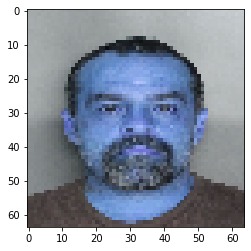

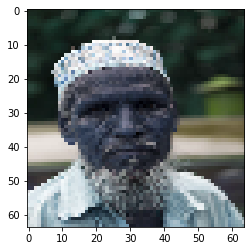

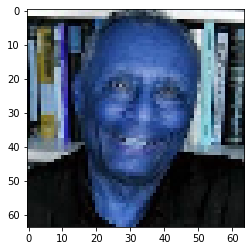

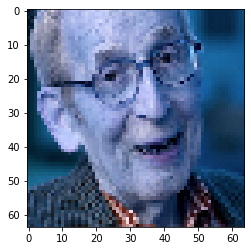

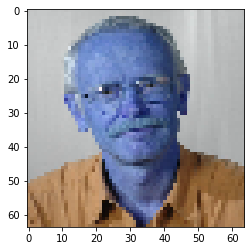

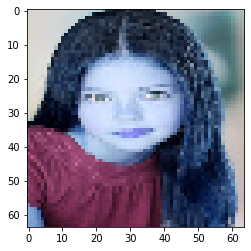

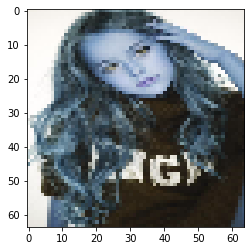

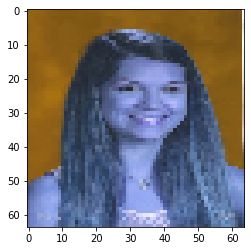

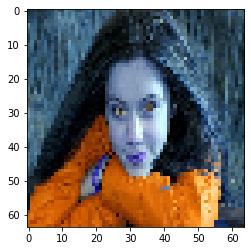

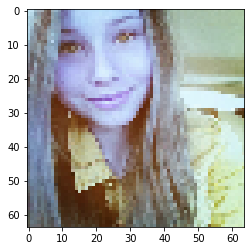

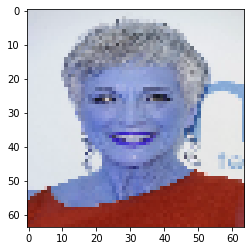

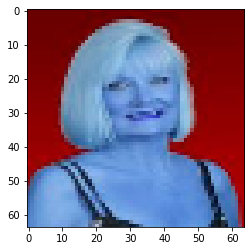

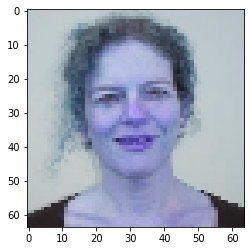

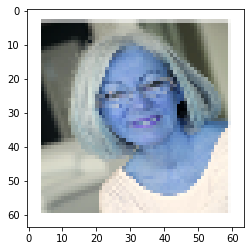

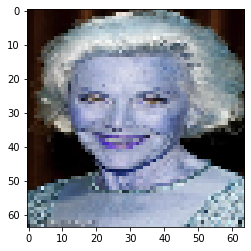

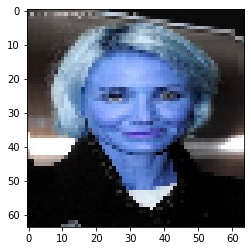

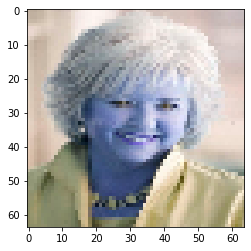

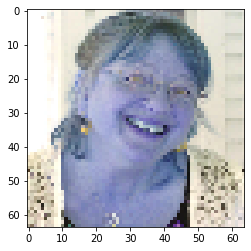

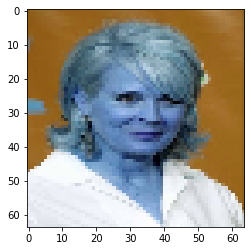

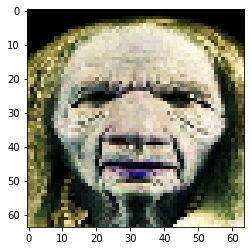

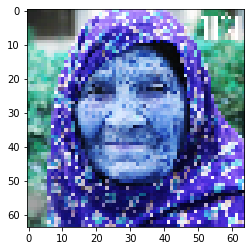

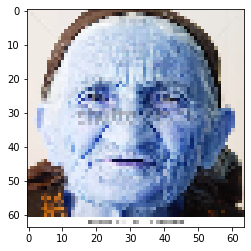

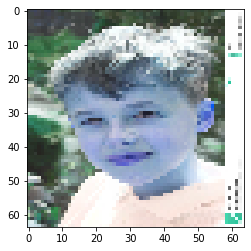

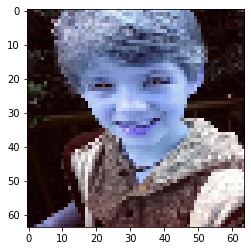

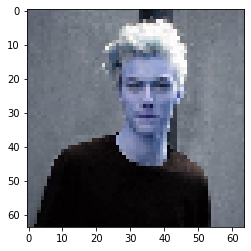

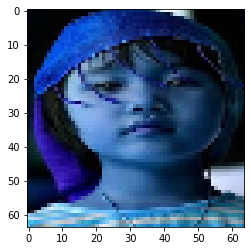

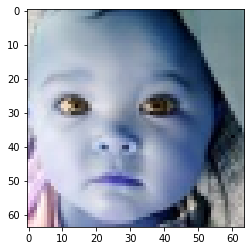

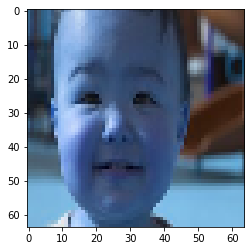

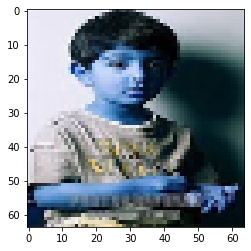

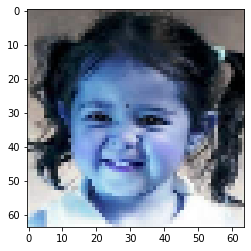

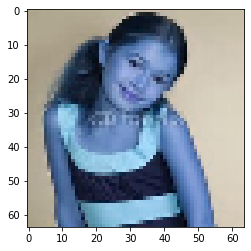

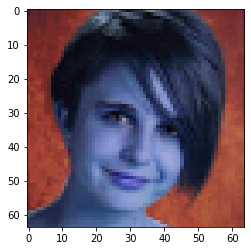

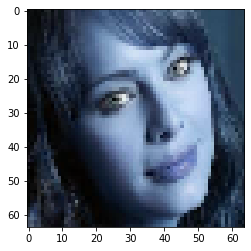

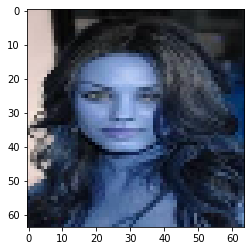

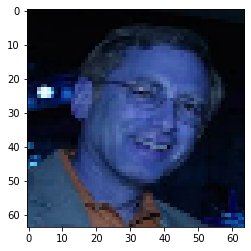

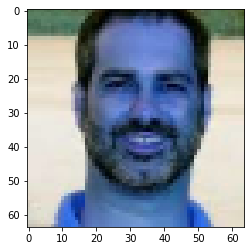

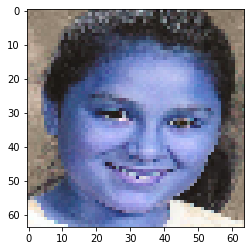

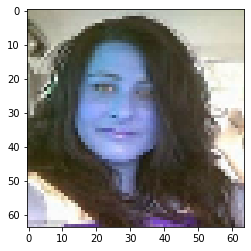

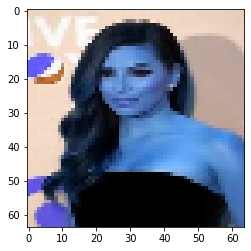

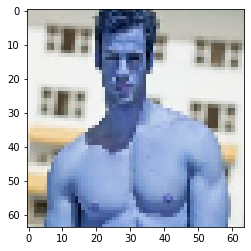

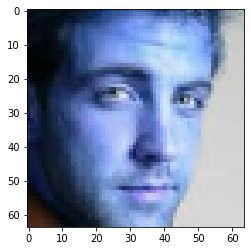

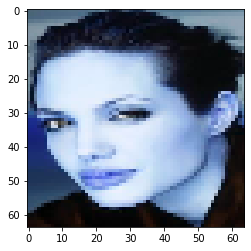

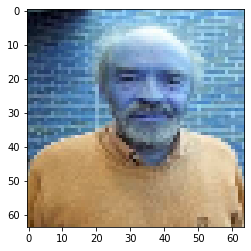

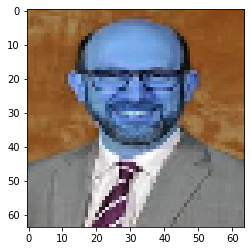

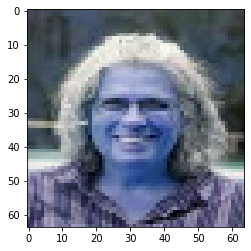

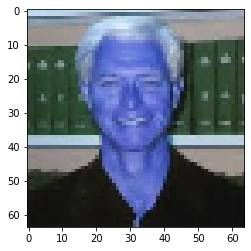

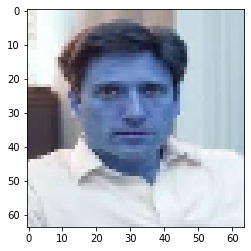

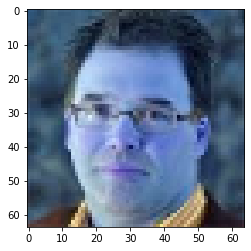

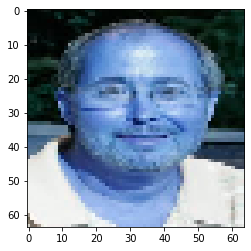

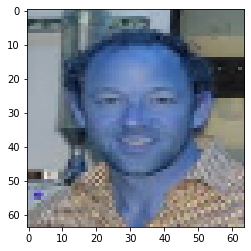

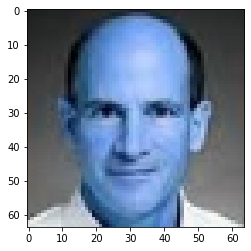

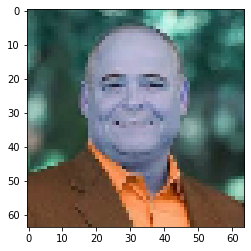

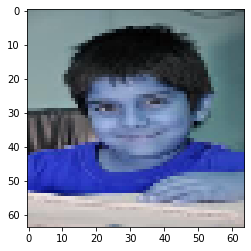

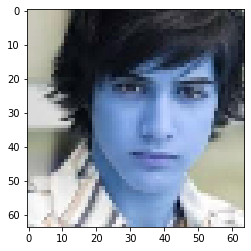

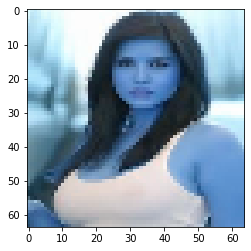

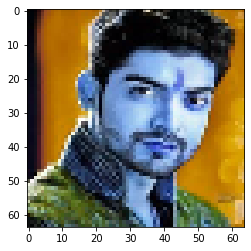

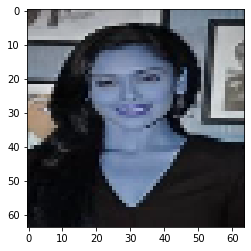

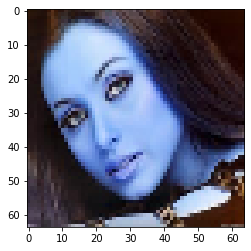

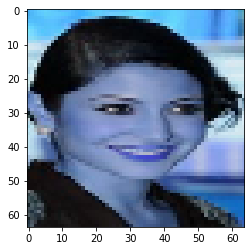

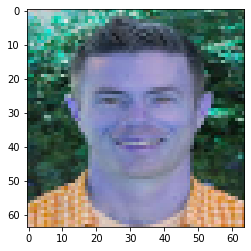

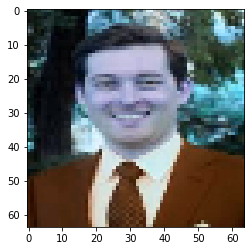

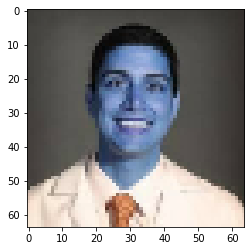

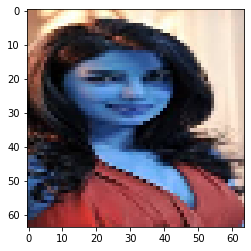

Age: 62


array([[[ 67,  70,  85],
        [ 68,  71,  86],
        [ 60,  63,  78],
        ...,
        [ 61,  64,  69],
        [ 65,  68,  72],
        [ 67,  71,  72]],

       [[ 65,  68,  82],
        [ 66,  69,  83],
        [ 60,  63,  77],
        ...,
        [ 59,  62,  66],
        [ 60,  64,  65],
        [ 61,  66,  64]],

       [[ 65,  70,  79],
        [ 66,  71,  80],
        [ 59,  64,  73],
        ...,
        [ 57,  62,  61],
        [ 55,  60,  59],
        [ 53,  59,  54]],

       ...,

       [[ 75,  79, 114],
        [ 34,  35,  72],
        [ 75,  74, 114],
        ...,
        [ 93,  94, 127],
        [ 59,  63,  88],
        [ 90,  95, 117]],

       [[ 56,  57,  92],
        [ 51,  50,  89],
        [115, 109, 150],
        ...,
        [ 83,  83, 119],
        [ 81,  83, 112],
        [ 78,  82, 107]],

       [[ 49,  48,  84],
        [ 68,  63, 102],
        [130, 122, 163],
        ...,
        [ 59,  58,  97],
        [105, 107, 138],
        [ 70,  73, 101]]

Samples in Training: 45
Samples in Testing: 18


In [ ]:
from google.colab import drive
import os
import cv2
import numpy as np
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.layers import *
from keras.models import *
from keras import backend as K

drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/select"
path = "/content/gdrive/My Drive/select"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])
images = []
ages = []
genders = []
def displayImage(image):
    plt.imshow(image)
    plt.show()
for file in files:
    image = cv2.imread(path+'/'+file,cv2.IMREAD_COLOR)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],3))
    displayImage(image)
    images.append(image)
    split_var = file.split('_')
    ages.append(split_var[0])
    genders.append(int(split_var[1]) )

idx = 44
sample = images[idx]
print("Age:",ages[idx])
def age_group(age):
    if age >=0 and age < 10:
        return 0
    elif 10<age < 20:
        return 1
    elif 20<age < 30:
        return 2
    elif 30<age < 40:
      return 3
    elif 40<age < 50:
      return 4
    elif 50<age < 60:
      return 5
    elif 60<age < 70:
      return 6
    elif 70<age < 80:
      return 7
    elif 80<age < 90:
      return 8
    elif 90<age < 100:
      return 9
    else:
        return 10
# pre processing
target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],3),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 10
    target[i,1] = int(genders[i])
    features[i] = images[i]
features = features / 255
display(sample)
#########
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.28,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

import tensorflow as tf
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.layers import Dense


model=Sequential()
age_model = model.add(Dense(units=50,input_shape=(64,64,3),activation='relu'))
age_model = model.add(Dense(units=10,activation='relu'))
age_model = model.add(Dense(units=5,activation='relu'))
age_model = model.add(Dense(units=2,activation='softmax'))

from keras.utils import np_utils
trainY=np_utils.to_categorical(y_train)
testY=np_utils.to_categorical(y_test)
TrainX=x_train.T